In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from matplotlib.ticker import StrMethodFormatter

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting['time'] = pd.to_datetime(riskforecasting['time'])
riskforecasting

,site,time,riskLevelLabel
0,ukc1101-06000,2020-05-14,0
1,ukc1101-06000,2020-05-15,0
2,ukc1101-06000,2020-05-16,0
3,ukc1101-06000,2020-05-17,0
4,ukc1101-06000,2020-05-18,0
...,...,...,...
207057,ukk4307-33900,2023-06-08,0
207058,ukk4307-33900,2023-06-09,0
207059,ukk4307-33900,2023-06-10,0
207060,ukk4307-33900,2023-06-11,0


In [5]:
optics = pd.read_csv("~data/optics.csv")
optics

,time,lat,lon,BBP,CDM,site
0,2020-01-01,52.703125,1.671876,NaN,NaN,ukh1303-10400
1,2020-01-01,52.703125,1.682293,NaN,NaN,ukh1303-10400
2,2020-01-01,52.703125,1.692710,NaN,NaN,ukh1303-10400
3,2020-01-01,52.703125,1.703126,NaN,NaN,ukh1303-10400
4,2020-01-01,52.703125,1.713543,NaN,NaN,ukh1303-10400
...,...,...,...,...,...,...
106037995,2022-12-31,52.494793,1.765626,NaN,NaN,ukh1303-10650
106037996,2022-12-31,52.494793,1.776043,NaN,NaN,ukh1303-10650
106037997,2022-12-31,52.494793,1.786460,NaN,NaN,ukh1303-10650
106037998,2022-12-31,52.494793,1.796876,NaN,NaN,ukh1303-10650


In [6]:
transp = pd.read_csv("~data/transp.csv")
transp

,time,lat,lon,SPM,KD490,ZSD,site
0,2020-01-01,52.703125,1.671876,NaN,NaN,NaN,ukh1303-10400
1,2020-01-01,52.703125,1.682293,NaN,NaN,NaN,ukh1303-10400
2,2020-01-01,52.703125,1.692710,NaN,NaN,NaN,ukh1303-10400
3,2020-01-01,52.703125,1.703126,NaN,NaN,NaN,ukh1303-10400
4,2020-01-01,52.703125,1.713543,NaN,NaN,NaN,ukh1303-10400
...,...,...,...,...,...,...,...
106037995,2022-12-31,52.494793,1.765626,NaN,NaN,NaN,ukh1303-10650
106037996,2022-12-31,52.494793,1.776043,NaN,NaN,NaN,ukh1303-10650
106037997,2022-12-31,52.494793,1.786460,NaN,NaN,NaN,ukh1303-10650
106037998,2022-12-31,52.494793,1.796876,NaN,NaN,NaN,ukh1303-10650


In [7]:
plankton = pd.read_csv("~data/plankton.csv")
plankton

,time,lat,lon,CHL,site
0,2020-01-01,52.703125,1.671876,NaN,ukh1303-10400
1,2020-01-01,52.703125,1.682293,NaN,ukh1303-10400
2,2020-01-01,52.703125,1.692710,NaN,ukh1303-10400
3,2020-01-01,52.703125,1.703126,NaN,ukh1303-10400
4,2020-01-01,52.703125,1.713543,NaN,ukh1303-10400
...,...,...,...,...,...
106037995,2022-12-31,52.494793,1.765626,NaN,ukh1303-10650
106037996,2022-12-31,52.494793,1.776043,NaN,ukh1303-10650
106037997,2022-12-31,52.494793,1.786460,NaN,ukh1303-10650
106037998,2022-12-31,52.494793,1.796876,NaN,ukh1303-10650


In [8]:
15*15*(2*365+366)*430

106038000

In [9]:
optics['time'] = pd.to_datetime(optics['time'])
transp['time'] = pd.to_datetime(transp['time'])
plankton['time'] = pd.to_datetime(plankton['time'])

In [10]:
feature = pd.merge(optics, transp, on=['time', 'lat', 'lon', 'site'], how='outer')
feature = pd.merge(feature, plankton, on=['time', 'lat', 'lon', 'site'], how='outer')

In [11]:
feature = feature.sort_values(by=['time', 'site', 'lat', 'lon'])
feature

,time,lat,lon,BBP,CDM,site,SPM,KD490,ZSD,CHL
58197810,2020-01-01,54.588543,-1.255207,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN
58197811,2020-01-01,54.588543,-1.244790,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN
58197812,2020-01-01,54.588543,-1.234374,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN
58197813,2020-01-01,54.588543,-1.223957,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN
58197814,2020-01-01,54.588543,-1.213540,NaN,NaN,ukc1101-06000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
53018785,2022-12-31,51.119793,-4.203124,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN
53018786,2022-12-31,51.119793,-4.192707,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN
53018787,2022-12-31,51.119793,-4.182291,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN
53018788,2022-12-31,51.119793,-4.171874,NaN,NaN,ukk4307-33900,NaN,NaN,NaN,NaN


In [12]:
len(feature['time'].unique())

1096

In [13]:
len(feature['site'].unique())

430

In [14]:
feature = feature[['time', 'site', 'BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']].reset_index(drop=True)
feature

,time,site,BBP,CDM,SPM,KD490,ZSD,CHL
0,2020-01-01,ukc1101-06000,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,ukc1101-06000,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,ukc1101-06000,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,ukc1101-06000,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,ukc1101-06000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
106037995,2022-12-31,ukk4307-33900,NaN,NaN,NaN,NaN,NaN,NaN
106037996,2022-12-31,ukk4307-33900,NaN,NaN,NaN,NaN,NaN,NaN
106037997,2022-12-31,ukk4307-33900,NaN,NaN,NaN,NaN,NaN,NaN
106037998,2022-12-31,ukk4307-33900,NaN,NaN,NaN,NaN,NaN,NaN


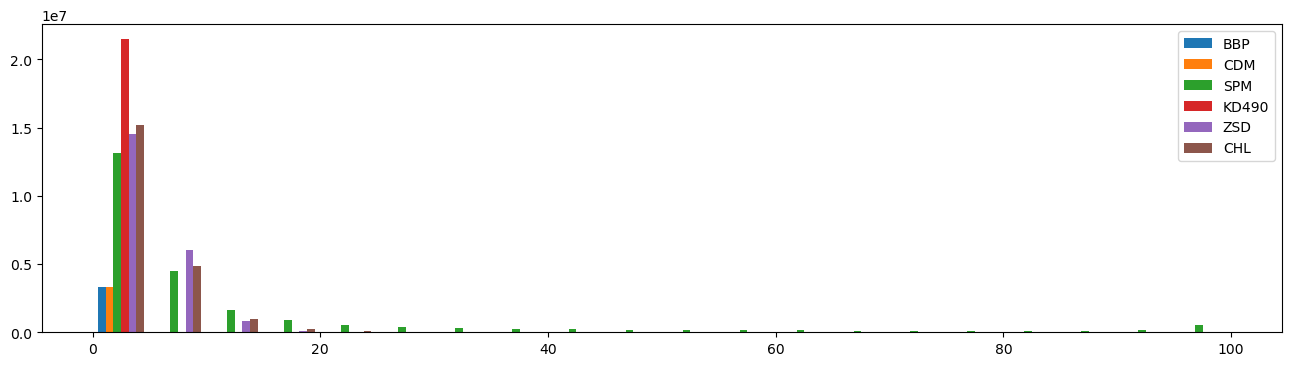

In [18]:
plt.figure(figsize=(16,4))
plt.hist(feature[['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']], 20)
plt.legend(['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL'])
plt.show()

## Risk Levels vs. Features

In [22]:
df = pd.merge(riskforecasting, feature, on=['site','time'])
df

,site,time,riskLevelLabel,BBP,CDM,SPM,KD490,ZSD,CHL
0,ukc1101-06000,2020-05-14,0,NaN,NaN,NaN,NaN,NaN,NaN
1,ukc1101-06000,2020-05-14,0,NaN,NaN,NaN,NaN,NaN,NaN
2,ukc1101-06000,2020-05-14,0,NaN,NaN,NaN,NaN,NaN,NaN
3,ukc1101-06000,2020-05-14,0,NaN,NaN,NaN,NaN,NaN,NaN
4,ukc1101-06000,2020-05-14,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
42099970,ukk4307-33900,2022-09-30,0,NaN,NaN,NaN,NaN,NaN,NaN
42099971,ukk4307-33900,2022-09-30,0,NaN,NaN,NaN,NaN,NaN,NaN
42099972,ukk4307-33900,2022-09-30,0,NaN,NaN,NaN,NaN,NaN,NaN
42099973,ukk4307-33900,2022-09-30,0,NaN,NaN,NaN,NaN,NaN,NaN


### Hist of each risk level in 'BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL'

Divide the values into intervals of 10s and group all values above 100 become a single intervel.

In [30]:
df_risk = df[['riskLevelLabel','BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']]

features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
for f in features:
    df_risk[f + '_Range'] = pd.cut(df_risk[f], bins=np.arange(0, df_risk[f].max()//100*100+101, 5))
df_risk

,riskLevelLabel,BBP,CDM,SPM,KD490,ZSD,CHL,BBP_Range,CDM_Range,SPM_Range,KD490_Range,ZSD_Range,CHL_Range
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42099970,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42099971,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42099972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42099973,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_increased = df_risk[df_risk['riskLevelLabel'] == 1].drop('riskLevelLabel',axis=1)
counts_increased = pd.DataFrame({
    'BBP': df_increased['BBP_Range'].value_counts(),
    'CDM': df_increased['CDM_Range'].value_counts(),
    'SPM': df_increased['SPM_Range'].value_counts(),
    'KD490': df_increased['KD490_Range'].value_counts(),
    'ZSD': df_increased['ZSD_Range'].value_counts(),
    'CHL': df_increased['CHL_Range'].value_counts(),
})

df_normal = df_risk[df_risk['riskLevelLabel'] == 0].drop('riskLevelLabel',axis=1)
counts_normal = pd.DataFrame({
    'BBP': df_increased['BBP_Range'].value_counts(),
    'CDM': df_increased['CDM_Range'].value_counts(),
    'SPM': df_increased['SPM_Range'].value_counts(),
    'KD490': df_increased['KD490_Range'].value_counts(),
    'ZSD': df_increased['ZSD_Range'].value_counts(),
    'CHL': df_increased['CHL_Range'].value_counts(),
})

In [32]:
new_row = pd.DataFrame(counts_normal[10:].sum(axis=0)).T
counts_normal = pd.concat([counts_normal[:10], new_row])
counts_normal.index.values[-1] = '(100.0, 550,0]'

In [33]:
new_row = pd.DataFrame(counts_increased[10:].sum(axis=0)).T
counts_increased = pd.concat([counts_increased[:10], new_row])
counts_increased.index.values[-1] = '(100.0, 550,0]'

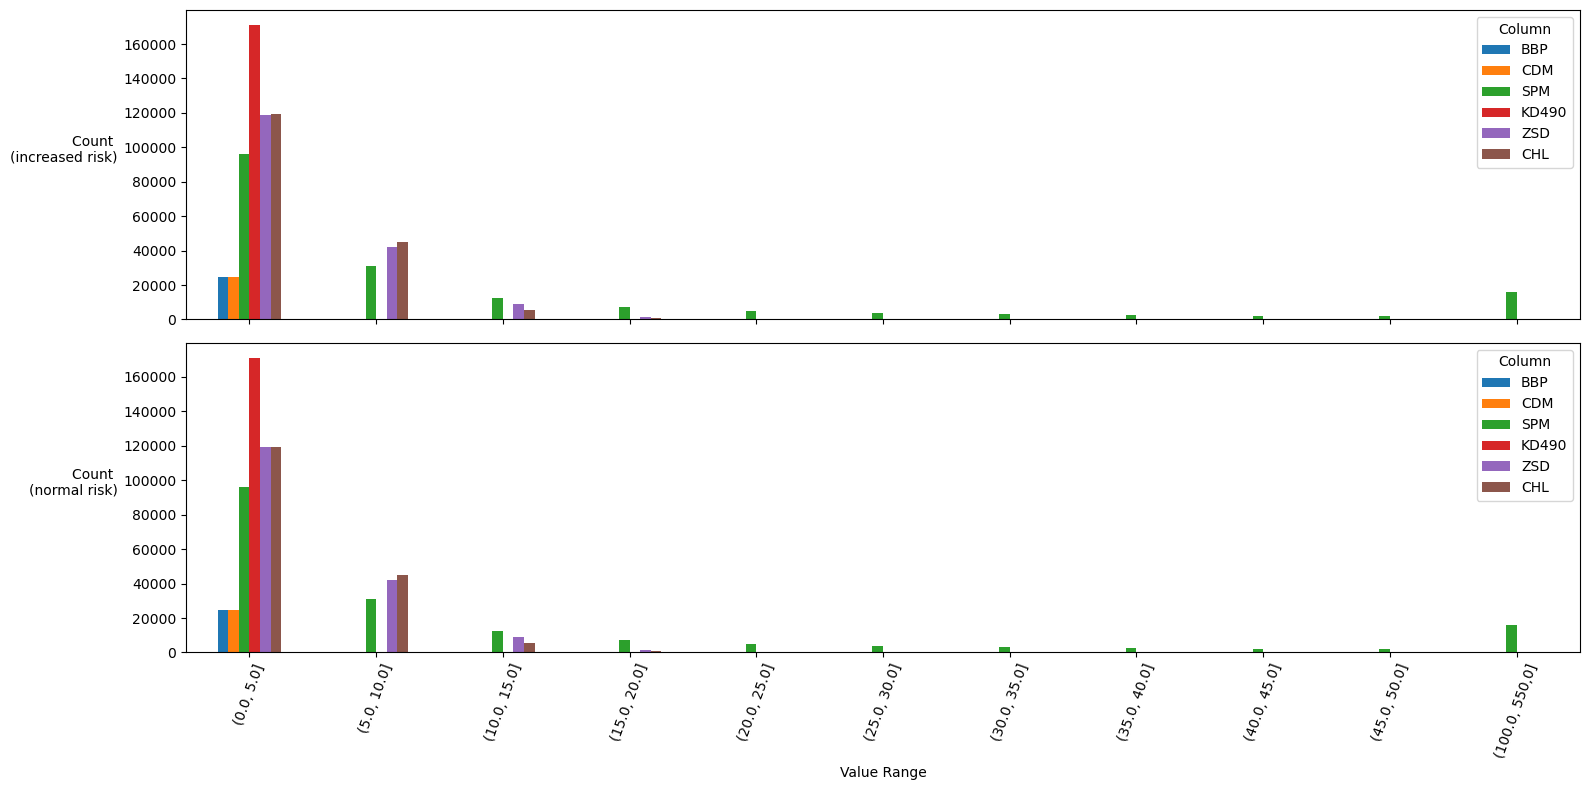

In [34]:
fig, axs = plt.subplots(2,1, figsize=(16, 8), sharex=True)

counts_increased.plot(kind='bar', ax=axs[0])
counts_normal.plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Value Range')
axs[0].set_ylabel(r'Count '+'\n'+'(increased risk)', rotation=0, ha='right')
axs[1].set_ylabel(r'Count '+'\n'+'(normal risk)', rotation=0, ha='right')
axs[0].legend(title='Column')
axs[1].legend(title='Column')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=70)
plt.tight_layout()
plt.show()